#Primer Parcial
<strong>Estudiante:</strong> Luis Fernando Romero Taboada<br>
<strong>CU:</strong> 35-5328<br>
<strong>Carrera:</strong>Ingenieria de Sistemas

<strong>Dataset:</strong> https://www.kaggle.com/datasets/mohamedafsal007/house-price-dataset-of-india

##Montamos el Google Drive

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ya que el Dataset no contaba con clasificacion, agregamos la columna clasificacion que cuenta con las clases del 0 al 4, un total de 5 clases cada uno va dirigido a un rango de precios de las casas

In [113]:
import numpy as np
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("/content/drive/MyDrive/datasets/MisDatasets/House_Price_India.csv")

dataset.head()

## verificamos el precio mas alto y mas bajo de las casas
print(dataset['Price'].max(), dataset['Price'].min())

# Filtrar el dataset para obtener solo las casas con precios en el rango
rango_razonable = dataset[(dataset['Price'] >= 78000) & (dataset['Price'] <= 300000)]
rango_moderado = dataset[(dataset['Price'] >= 300001) & (dataset['Price'] <= 400000)]
rango_alto = dataset[(dataset['Price'] >= 400001) & (dataset['Price'] <= 525000)]
rango_muyalto = dataset[(dataset['Price'] >= 525001) & (dataset['Price'] <= 725000)]
rango_lujoextremo = dataset[(dataset['Price'] >= 725001) & (dataset['Price'] <= 7700000)]

# Contar cuántos datos están en ese rango
cantidad_razonable = rango_razonable.shape[0]
cantidad_moderado = rango_moderado.shape[0]
cantidad_alto = rango_alto.shape[0]
cantidad_muyalto = rango_muyalto.shape[0]
cantidad_lujoextremo = rango_lujoextremo.shape[0]

print(f'Cantidad de casas en el rango de 78000 a 300000: {cantidad_razonable}')
print(f'Cantidad de casas en el rango de 300001 a 400000: {cantidad_moderado}')
print(f'Cantidad de casas en el rango de 400001 a 525000: {cantidad_alto}')
print(f'Cantidad de casas en el rango de 525001 a 725000: {cantidad_muyalto}')
print(f'Cantidad de casas en el rango de 725001 a 7700000: {cantidad_lujoextremo}')

# Agregamos una columna para definir las clases segun un rango de precio, lambda define una funcion anonima
dataset["Clasificacion"] = dataset['Price'].apply(lambda x: 0 if x in range(78000, 300001)
                                                            else 1 if x in range(300001, 400001)
                                                            else 2 if x in range(400001, 525001)
                                                            else 3 if x in range(525001, 725001)
                                                            else 4)

# Creamos una copia del dataset ya incorporado la columna
data = dataset.copy()
data

7700000 78000
Cantidad de casas en el rango de 78000 a 300000: 3113
Cantidad de casas en el rango de 300001 a 400000: 2875
Cantidad de casas en el rango de 400001 a 525000: 2987
Cantidad de casas en el rango de 525001 a 725000: 2946
Cantidad de casas en el rango de 725001 a 7700000: 2699


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,0,122003,52.8645,-114.557,2880,5400,2,58,2380000,4
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,4
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,4
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,4
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,0,122066,52.6191,-114.472,2250,17286,3,76,221700,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,0,122072,52.5075,-114.393,1540,7480,3,59,219200,0
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,0,122056,52.7289,-114.507,1130,6120,2,64,209000,0
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,0,122042,52.7157,-114.411,1420,6631,3,54,205000,0


## 1. Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [114]:
# Generar atributo tipo caracter ficticio
data['Tipo de Escuela'] = data['Number of schools nearby'].apply(lambda x: 'A' if x == 1
                                                          else 'B' if x == 2
                                                          else 'C')

# Generar atributo de texto ficticio
data['Estado neutral'] = data['condition of the house'].apply(lambda x: 'Muy deteriorado' if x == 1
                                                              else 'Deteriorado' if x == 2
                                                              else 'Regular' if x == 3
                                                              else 'Buen estado' if x == 4
                                                              else 'Excelente estado')

# Generar valores Booleanos
data['Cerca del Aeropuerto'] = data['Distance from the airport'].apply(lambda x: 1 if x in range(50,66) else 0)

data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,-114.557,2880,5400,2,58,2380000,4,B,Excelente estado,1
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,-114.470,2470,4000,2,51,1400000,4,B,Excelente estado,1
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,-114.468,2940,6600,1,53,1200000,4,A,Regular,1
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,-114.321,3350,42847,3,76,838000,4,C,Regular,0
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,-114.485,2060,4500,1,51,805000,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,-114.472,2250,17286,3,76,221700,0,C,Buen estado,0
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,-114.393,1540,7480,3,59,219200,0,C,Buen estado,1
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,-114.507,1130,6120,2,64,209000,0,B,Regular,1
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,-114.411,1420,6631,3,54,205000,0,C,Buen estado,1


##2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [115]:
# Duplicar el dataset con variaciones mínimas en los valores de los píxeles
data_duplicado = data.copy()
print('Dataset original')
print(data_duplicado.shape)

# generar matriz de numeros aleatorios con distribucion normal, con media de 0 y desviacion estandar 0.05
data_duplicado.iloc[:, :23] += np.random.normal(0, 0.05, size=(data_duplicado.shape[0], 23))

# Concatenar el dataset original y duplicado
synthetic_dataset = pd.concat([data, data_duplicado], ignore_index=True) # reorganizar el dataframe para no tener indices repetidos

print('Datos del Dataset sintetico')
print(synthetic_dataset.shape)
synthetic_dataset


Dataset original
(14620, 27)
Datos del Dataset sintetico
(29240, 27)


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,B,Excelente estado,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,B,Excelente estado,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,A,Regular,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,C,Regular,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,A,Buen estado,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.002608,2.108271,1.499160,1555.912534,20000.002181,1.024614,0.017806,-0.077232,4.010718,...,-114.393795,2250.029937,17285.922037,2.996751,75.990187,2.217000e+05,0,C,Buen estado,0
29236,6.762830e+09,42733.997867,3.035528,1.937255,1679.973668,6999.913486,1.476512,-0.006358,0.030240,4.012767,...,-114.327480,1540.028068,7479.983543,2.916896,59.050590,2.192001e+05,0,C,Buen estado,1
29237,6.762831e+09,42734.029599,2.086804,0.950096,1070.020904,6120.024987,0.969417,-0.029854,0.022917,3.020013,...,-114.502225,1130.053565,6120.065439,2.008014,64.052539,2.090000e+05,0,B,Regular,1
29238,6.762831e+09,42733.988135,4.083305,0.914828,1029.949842,6621.039604,0.816294,-0.026407,0.101814,4.002602,...,-114.407750,1419.951002,6630.841031,3.075495,54.027618,2.050000e+05,0,C,Buen estado,1


##3. Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

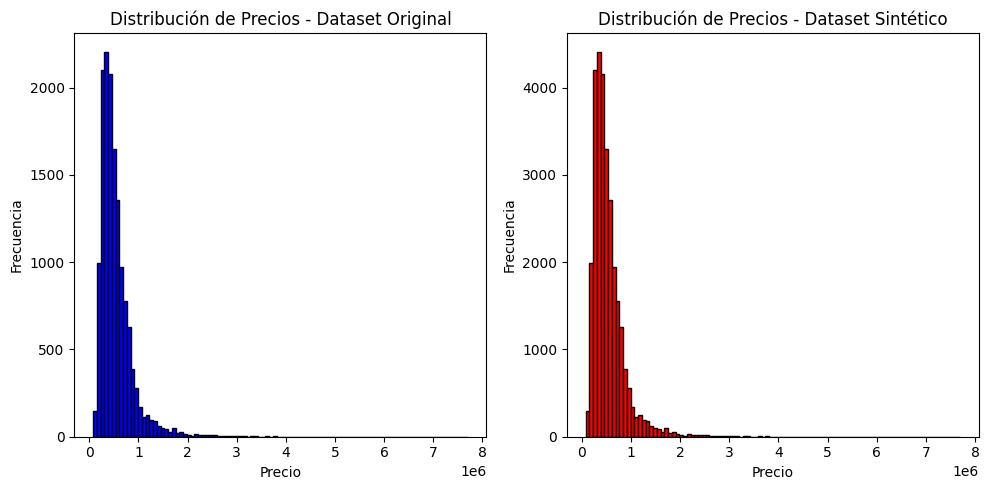

In [116]:
import matplotlib.pyplot as plt

# Configuración para visualización
plt.figure(figsize=(10, 5))

# Gráfico del dataset original
plt.subplot(1, 2, 1)
plt.hist(data['Price'], bins=100, color='blue', edgecolor='black') #histograma con 100 numeros de intervalo
plt.title('Distribución de Precios - Dataset Original')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Gráfico del dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_dataset['Price'], bins=100, color='red', edgecolor='black')
plt.title('Distribución de Precios - Dataset Sintético')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.tight_layout() # ajusta automaticamente el diseño de la grafica para que no se superpongan
plt.show()


In [117]:
# Convertir 'Tipo de Escuela' a números únicos
# 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
synthetic_dataset['Tipo de Escuela'] = synthetic_dataset['Tipo de Escuela'].astype('category').cat.codes
synthetic_dataset['Estado neutral'] = synthetic_dataset['Estado neutral'].astype('category').cat.codes

synthetic_dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Clasificacion,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
0,6.762810e+09,42491.000000,5.000000,2.500000,3650.000000,9050.000000,2.000000,0.000000,4.000000,5.000000,...,-114.557000,2880.000000,5400.000000,2.000000,58.000000,2.380000e+06,4,1,2,1
1,6.762811e+09,42491.000000,4.000000,2.500000,2920.000000,4000.000000,1.500000,0.000000,0.000000,5.000000,...,-114.470000,2470.000000,4000.000000,2.000000,51.000000,1.400000e+06,4,1,2,1
2,6.762811e+09,42491.000000,5.000000,2.750000,2910.000000,9480.000000,1.500000,0.000000,0.000000,3.000000,...,-114.468000,2940.000000,6600.000000,1.000000,53.000000,1.200000e+06,4,0,4,1
3,6.762813e+09,42491.000000,4.000000,2.500000,3310.000000,42998.000000,2.000000,0.000000,0.000000,3.000000,...,-114.321000,3350.000000,42847.000000,3.000000,76.000000,8.380000e+05,4,2,4,0
4,6.762813e+09,42491.000000,3.000000,2.000000,2710.000000,4500.000000,1.500000,0.000000,0.000000,4.000000,...,-114.485000,2060.000000,4500.000000,1.000000,51.000000,8.050000e+05,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,6.762830e+09,42734.002608,2.108271,1.499160,1555.912534,20000.002181,1.024614,0.017806,-0.077232,4.010718,...,-114.393795,2250.029937,17285.922037,2.996751,75.990187,2.217000e+05,0,2,0,0
29236,6.762830e+09,42733.997867,3.035528,1.937255,1679.973668,6999.913486,1.476512,-0.006358,0.030240,4.012767,...,-114.327480,1540.028068,7479.983543,2.916896,59.050590,2.192001e+05,0,2,0,1
29237,6.762831e+09,42734.029599,2.086804,0.950096,1070.020904,6120.024987,0.969417,-0.029854,0.022917,3.020013,...,-114.502225,1130.053565,6120.065439,2.008014,64.052539,2.090000e+05,0,1,4,1
29238,6.762831e+09,42733.988135,4.083305,0.914828,1029.949842,6621.039604,0.816294,-0.026407,0.101814,4.002602,...,-114.407750,1419.951002,6630.841031,3.075495,54.027618,2.050000e+05,0,2,0,1


##4. Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [118]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
train_data, test_data = train_test_split(synthetic_dataset, test_size=0.2, random_state=42)
print(f'Datos de entrenamiento: {train_data.shape}')
print(f'Datos de prueba: {test_data.shape}')

# Dividimos los datos para X_test y y_test donde se utilizaran los datos para las pruebas
X_test = test_data.iloc[:, np.r_[2:23,24:27]]
y_test = test_data.iloc[:, 23]
# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, np.r_[2:23,24:27]]
y_train = train_data.iloc[:, 23]

m = y_train.size

Datos de entrenamiento: (23392, 27)
Datos de prueba: (5848, 27)


##5. Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [119]:
def datasetsCreate(y):
    data = {}
    # Convertir la Serie en un DataFrame y asignar un nombre de columna
    y = y.to_frame(name='Clasificacion')
    for i in range(5):
        # Crear un nuevo DataFrame basado en la condición de la clase actual
        data_modified = y.copy()  # Copiar el DataFrame original
        data_modified['Clasificacion'] = np.where(y['Clasificacion'] == i, 1, 0)  # Reemplazar valores
        data[f'data_{i}'] = data_modified  # Almacenar el DataFrame en el diccionario con una clave adecuada

    # Retornar los 5 DataFrames
    return data['data_0'], data['data_1'], data['data_2'], data['data_3'], data['data_4']

In [120]:
y1_train, y2_train, y3_train, y4_train, y5_train = datasetsCreate(y_train)

## Para la clase 0: y = 1, caso contrario: y = 0

In [121]:
concat1 = pd.concat([y1_train, y_train], axis=1) # concatenacion horizontal
concat1

,Clasificacion,Clasificacion
16640,0,1
26583,1,0
19669,0,1
7497,1,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 1: y = 1, caso contrario: y = 0

In [122]:
concat2 = pd.concat([y2_train, y_train], axis=1)
concat2

,Clasificacion,Clasificacion
16640,1,1
26583,0,0
19669,1,1
7497,0,0
11624,0,4
...,...,...
21575,1,1
5390,0,4
860,0,2
15795,1,1


##Para la clase 2: y = 1, caso contrario: y = 0

In [123]:
concat3 = pd.concat([y3_train, y_train], axis=1)
concat3

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,1,2
15795,0,1


##Para la clase 3: y = 1, caso contrario: y = 0

In [124]:
concat4 = pd.concat([y4_train, y_train], axis=1)
concat4

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,0,4
...,...,...
21575,0,1
5390,0,4
860,0,2
15795,0,1


##Para la clase 4: y = 1, caso contrario: y = 0

In [125]:
concat5 = pd.concat([y5_train, y_train], axis=1)
concat5

,Clasificacion,Clasificacion
16640,0,1
26583,0,0
19669,0,1
7497,0,0
11624,1,4
...,...,...
21575,0,1
5390,1,4
860,0,2
15795,0,1


In [126]:
y1_test, y2_test, y3_test, y4_test, y5_test = datasetsCreate(y_test)
y1_test

,Clasificacion
13599,0
963,0
25666,0
1412,0
15962,0
...,...
11876,1
5503,0
16196,0
1809,0


#Realizamos la regresion logistica

##<li>Calcular la funcion sigmoidea</li>

In [127]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [128]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [129]:
# llama featureNormalize con los datos cargados
X_train_norm, mu, sigma = featureNormalize(X_train)
X_train_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
16640,0.704554,-0.420673,0.101901,-0.198436,-0.976930,0.003744,-0.342157,2.426206,-0.615810,-0.839499,...,-0.145911,-0.241480,-0.577008,-0.268817,1.273472,0.343808,-0.444985,1.211579,-0.425885,-1.033566
26583,-0.395220,-1.447505,-0.813613,-0.204073,-0.183794,-0.208999,-0.334919,-0.594965,-1.391311,-0.554009,...,-0.601977,-0.782673,-1.136961,-0.210718,1.265703,-1.223068,-0.911751,1.211579,0.715796,0.967524
19669,-0.343403,-1.408070,-1.165006,-0.154923,-0.893065,0.269505,-0.336206,0.905738,-0.622974,-0.946660,...,0.476076,1.126910,-1.108399,-0.201385,1.250305,-0.994685,-0.538312,1.211579,-1.567567,0.967524
7497,0.650809,0.474515,-0.259997,-0.228596,0.920503,-0.083559,-0.307229,0.857544,-0.585459,0.064577,...,-1.500214,1.256676,-0.203606,-0.242257,1.210814,0.229259,-0.668969,1.211579,-1.567567,-1.033566
11624,-0.402618,0.474515,0.644960,0.216406,-0.932630,-0.083559,4.860586,-0.646926,1.105399,0.326295,...,1.396517,-1.094558,0.615009,0.284738,1.210814,0.564869,1.218892,1.211579,0.715796,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.605313,-0.576204,-1.175666,-0.205647,-0.097614,-0.019277,-0.317995,0.837529,-1.373433,-0.958556,...,0.569896,-0.177272,-1.036587,-0.213051,1.185740,-0.669618,-0.631638,1.211579,-1.567567,0.967524
5390,-0.402618,0.151163,1.241168,4.011739,0.920503,-0.083559,-0.307229,0.857544,1.950828,1.741956,...,-0.300280,0.156244,1.749580,-0.183378,-0.013277,-1.448792,0.554941,-0.013300,-1.567567,0.967524
860,-1.456045,0.474515,-0.845558,-0.355144,0.920503,-0.083559,-0.307229,-0.646926,0.259970,-0.768165,...,0.343672,-0.650285,-0.979136,-0.431572,-1.237367,-0.441962,-0.111677,-1.238180,0.715796,0.967524
15795,0.723965,0.888990,-0.323895,-0.251469,-0.969181,-0.330440,-0.227234,-0.596684,-0.539151,-0.899016,...,-0.755668,-0.264262,-0.261102,-0.224717,-1.307559,1.014762,-0.526313,-1.238180,0.715796,-1.033566


##Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [130]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

In [131]:
print(X_ready.shape)

(23392, 25)


## Funcion para calcular los costos
Se utiliza para calcular el costo o la función de pérdida en un modelo de regresión logística

In [132]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T)) # Predecir las probabilidades usando la función sigmoide
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) # Calcular el costo

    return J

##Funcion para calcular el descenso de gradiente
Este algoritmo minimiza la función de costo ajustando los valores de theta


In [133]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T)) # Calcula la hipótesis h utilizando la función sigmoid
        theta = theta - (alpha / m) * (h - y).dot(X) # Actualiza theta usando la regla de actualización del descenso por el gradiente

        J_history.append(calcularCosto(theta, X, y)) # Calcula el costo con los parámetros actuales y lo añade al historial
    return theta, J_history

##Realizamos pruebas para y1_train

In [134]:
y1_train = y1_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.39606699 -0.04671292 -0.17018237 -0.18096214 -0.07036987 -0.17522699
 -0.01903416 -0.09227163 -0.09405765 -0.29540891 -0.12977008 -0.13498278
  0.05725245 -0.03296329  0.29694439 -0.70750752  0.02252792 -0.21958225
 -0.05750839  0.0036205   0.00150839 -0.40257806  0.00466375  0.01426233
  0.00928696]


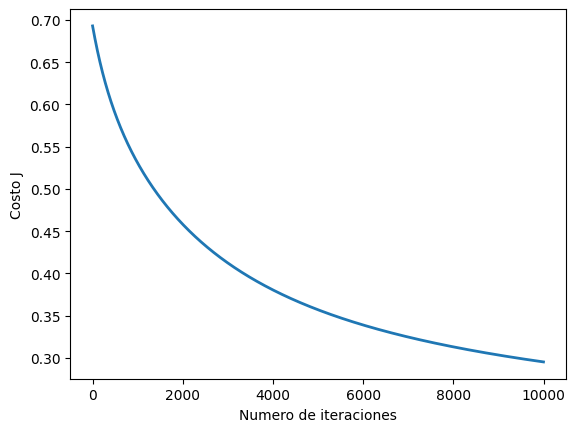

In [135]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = descensoGradiente(theta, X_ready, y1_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#Realizamos pruebas

In [136]:
# Normalizamos X_test
X_test_norm = (X_test - mu) / sigma
m_test = X_test.shape[0]
X_test_norm

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Tipo de Escuela,Estado neutral,Cerca del Aeropuerto
13599,-1.456045,0.151163,-0.760386,-0.362435,2.773636,-0.083559,-0.307229,-0.646926,-0.585459,-0.554031,...,0.795494,0.634692,-0.749349,-0.439816,-1.237367,-1.225052,-0.205003,-1.238180,0.715796,0.967524
963,-1.456045,-1.465594,-1.420472,-0.289575,-0.932630,-0.083559,-0.307229,2.362015,-2.276316,-1.232121,...,0.939768,-1.026209,-0.835519,-0.297052,1.210814,-1.672533,-0.342326,1.211579,-0.425885,0.967524
25666,0.659460,0.638234,0.943045,-0.233318,0.878961,-0.308174,-0.298105,-0.636102,0.280050,1.408882,...,-2.307349,0.049617,0.844927,-0.239807,-1.279686,1.343092,-0.444985,-1.238180,0.715796,-1.033566
1412,0.650809,2.091271,1.124055,-0.144668,1.847069,-0.083559,-0.307229,-0.646926,1.950828,1.611096,...,-0.000473,-0.048806,0.571924,-0.122632,1.210814,1.571700,2.234818,1.211579,0.715796,-1.033566
15962,-0.413420,-0.558090,-0.856307,-0.326816,-1.009790,-0.311633,-0.295724,2.362724,-0.602865,-1.172663,...,0.908212,-0.443174,-1.180146,-0.383387,1.173313,0.569611,-0.213002,1.211579,-0.425885,-1.033566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11876,-0.402618,-0.495540,-0.728446,-0.358790,0.920503,-0.083559,-0.307229,-0.646926,-0.585459,-1.006091,...,0.042457,-0.684459,-0.950412,-0.440827,-1.237367,0.005519,-0.660969,-1.238180,0.715796,0.967524
5503,-0.402618,-0.495540,0.080693,-0.126414,-0.932630,-0.083559,2.276678,0.857544,-0.585459,-0.791957,...,0.183916,-0.233351,0.255967,-0.161133,-0.013277,-1.001312,0.434950,-0.013300,-1.567567,0.967524
16196,-0.457397,0.453054,0.155299,-0.295947,0.857824,0.825293,-0.264375,-0.606699,-0.566722,0.528610,...,-0.281494,1.014516,0.356472,-0.315873,-1.261827,1.342290,-0.391656,-1.238180,0.715796,-1.033566
1809,0.650809,-0.495540,-0.409049,-0.283281,-0.006064,-0.083559,-0.307229,0.857544,-0.585459,-0.411276,...,0.117057,-0.547760,-0.103074,-0.326608,-0.013277,-1.448792,-0.005018,-0.013300,-1.567567,0.967524


In [137]:
# Concatenamos numeros unos
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
X_test_ready

array([[ 1.        , -1.4560445 ,  0.15116316, ..., -1.23817962,
         0.71579592,  0.96752431],
       [ 1.        , -1.4560445 , -1.46559371, ...,  1.21157913,
        -0.42588539,  0.96752431],
       [ 1.        ,  0.6594596 ,  0.63823353, ..., -1.23817962,
         0.71579592, -1.03356576],
       ...,
       [ 1.        , -0.45739713,  0.45305441, ..., -1.23817962,
         0.71579592, -1.03356576],
       [ 1.        ,  0.65080917, -0.49553959, ..., -0.01330025,
        -1.5675667 ,  0.96752431],
       [ 1.        , -0.36818989, -1.45905159, ..., -0.01330025,
        -1.5675667 ,  0.96752431]])

In [138]:
y_pred = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred.append(sigmoid(np.dot(i, theta)))

y_pred = np.array(y_pred)
y_pred

array([0.13124741, 0.32393517, 0.47142606, ..., 0.22308217, 0.2927691 ,
       0.74007292])

In [139]:
umbral = (y_pred >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral

array([0, 0, 0, ..., 0, 0, 1])

In [140]:
y1_test = y1_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy

In [141]:
# Crear un DataFrame
result = pd.DataFrame({'y_test': y1_test, 'prediccion': umbral})

# Mostrar el DataFrame
result

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,1,1
5844,0,0
5845,0,0
5846,0,0


In [142]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y1_test, umbral)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 91.16%


#Hacemos la prueba con y2_train


In [143]:
y2_train = y2_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.25580988e+00  3.13350233e-02 -1.31169005e-02 -9.85375271e-02
 -1.60117845e-02  2.23005295e-02  9.46091551e-03 -5.73741684e-02
 -3.85770822e-02 -1.34967468e-01 -7.57095502e-02 -6.40975403e-02
  1.68180556e-01 -3.77396606e-02  9.50966834e-02 -3.09940885e-02
 -1.25030811e-02 -1.04236337e-01 -9.36370517e-03 -7.92472808e-04
  1.85312219e-03 -3.29449384e-01 -1.90383465e-03  2.20576486e-02
 -1.12422515e-02]


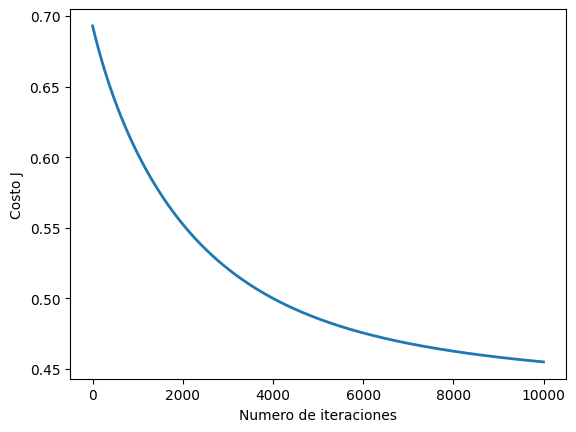

In [144]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta1 = np.zeros(25)
theta1, J_history = descensoGradiente(theta1, X_ready, y2_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta1)))

In [145]:
y_pred1 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred1.append(sigmoid(np.dot(i, theta1)))

y_pred1 = np.array(y_pred1)
y_pred1

array([0.31988787, 0.26509058, 0.27165933, ..., 0.28907509, 0.2203069 ,
       0.33350391])

In [146]:
umbral1 = (y_pred1 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral1

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
y2_test = y2_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y2_test

array([0, 0, 1, ..., 1, 0, 0])

In [148]:
result1 = pd.DataFrame({'y_test': y2_test, 'prediccion': umbral1})

# Mostrar el DataFrame
result1

,y_test,prediccion
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,1,0
5846,0,0


In [149]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y2_test, umbral1)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.89%


##Hacemos la prueba con y3_train

In [150]:
y3_train = y3_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.18954980e+00 -2.44249739e-02  5.18229203e-02 -6.82295952e-02
  1.64908486e-02  2.80890096e-02 -2.22987737e-02 -4.51062655e-02
 -1.82418329e-02 -5.77710315e-02 -1.09248426e-01  6.15154685e-02
  6.75816240e-02 -1.81283932e-02 -1.71925951e-01  3.19008551e-01
  4.36941741e-02 -5.67112790e-02  3.70427516e-02 -6.71988911e-03
  1.07876641e-04 -1.87726389e-01 -6.71030798e-03  5.48009273e-04
  1.12554283e-02]


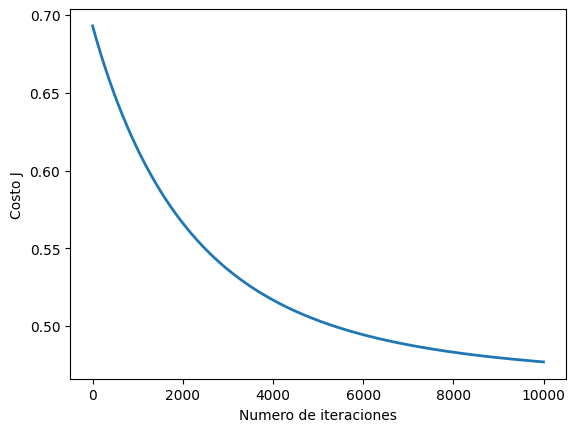

In [151]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta2 = np.zeros(25)
theta2, J_history = descensoGradiente(theta2, X_ready, y3_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta2)))

In [152]:
y_pred2 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred2.append(sigmoid(np.dot(i, theta2)))

y_pred2 = np.array(y_pred2)
y_pred2

array([0.44582462, 0.38078923, 0.11075681, ..., 0.27691872, 0.19659759,
       0.16221093])

In [153]:
umbral2 = (y_pred2 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral2

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
y3_test = y3_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y3_test

array([1, 1, 0, ..., 0, 0, 0])

In [155]:
result2 = pd.DataFrame({'y_test': y3_test, 'prediccion': umbral2})

# Mostrar el DataFrame
result2

,y_test,prediccion
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [156]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y3_test, umbral2)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.29%


##Hacemos la prueba con y4_train

In [157]:
y4_train = y4_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.20830205  0.07998152  0.04491023 -0.00145116  0.03853337  0.11071965
 -0.0274468  -0.05474598  0.08897218  0.0697948  -0.02901936  0.05105892
 -0.08005172 -0.00749056 -0.29461853  0.29493827  0.05664958  0.06961418
  0.040397   -0.00929595 -0.00318483 -0.00896817 -0.00913589 -0.01310544
 -0.01579037]


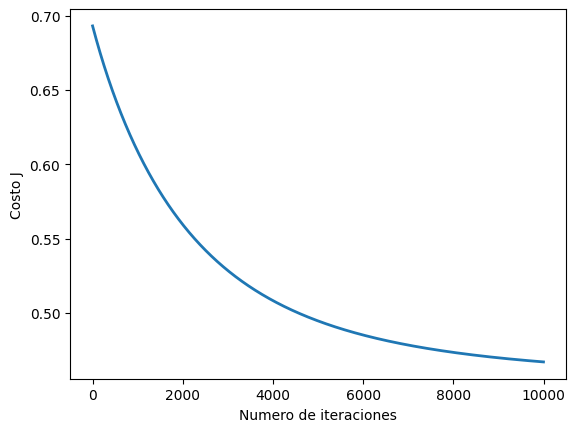

In [158]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta3 = np.zeros(25)
theta3, J_history = descensoGradiente(theta3, X_ready, y4_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta3)))

In [159]:
y_pred3 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred3.append(sigmoid(np.dot(i, theta3)))

y_pred3 = np.array(y_pred3)
y_pred3

array([0.35887374, 0.31537787, 0.12789583, ..., 0.2511386 , 0.20875088,
       0.09333952])

In [160]:
umbral3 = (y_pred3 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral3

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
y4_test = y4_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y4_test

array([0, 0, 0, ..., 0, 1, 0])

In [162]:
result3 = pd.DataFrame({'y_test': y4_test, 'prediccion': umbral3})

# Mostrar el DataFrame
result3

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5843,0,0
5844,1,0
5845,0,0
5846,1,0


In [163]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y4_test, umbral3)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 79.70%


##Hacemos la prueba con y5_train

In [164]:
y5_train = y5_train.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un arra NumPy

theta calculado por el descenso por el gradiente: [-1.41517500e+00 -1.26968162e-02  1.01193896e-01  2.97425634e-01
  1.48191477e-02  3.69315555e-02  6.54676018e-02  1.99993523e-01
  8.15371438e-02  3.95336003e-01  2.84610012e-01  8.89421961e-02
 -1.95257392e-01  9.97068214e-02  3.05550270e-02  1.91300653e-01
 -1.28676960e-01  2.80032390e-01 -2.71457189e-02  1.57877504e-02
  8.95258198e-04  8.59900791e-01  1.53248235e-02 -3.42959721e-02
  4.64059175e-03]


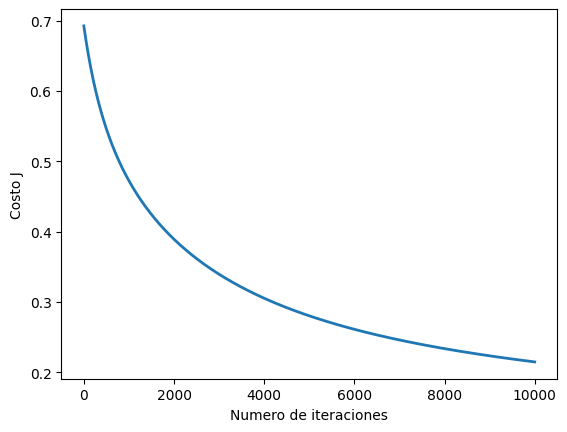

In [165]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta4 = np.zeros(25)
theta4, J_history = descensoGradiente(theta4, X_ready, y5_train, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta4)))

In [166]:
y_pred4 = [] # iniciamos la y_pred donde almacenaremos las predicciones

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_pred4.append(sigmoid(np.dot(i, theta4)))

y_pred4 = np.array(y_pred4)
y_pred4

array([0.06011924, 0.04332504, 0.16736522, ..., 0.09685502, 0.18085297,
       0.05246467])

In [167]:
umbral4 = (y_pred4 >= 0.5).astype(int) # Una forma de redondear entre 1 y 0
umbral4

array([0, 0, 0, ..., 0, 0, 0])

In [168]:
y5_test = y5_test.to_numpy().ravel() # convierte ya sea de una Serie o Dataframe a un array NumPy
y5_test

array([0, 0, 0, ..., 0, 0, 0])

In [169]:
result4 = pd.DataFrame({'y_test': y5_test, 'prediccion': umbral4})

# Mostrar el DataFrame
result4

,y_test,prediccion
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
5843,0,0
5844,0,0
5845,0,0
5846,0,0


In [170]:
# Calcular la precisión con una función lambda
calcular_precision = lambda y_real, y_pred: (sum(y_real == y_pred) / y_real.shape[0]) * 100

# Calcular y mostrar la precisión del modelo
precision = calcular_precision(y5_test, umbral4)
print(f"La precisión del modelo es: {precision:.2f}%")

La precisión del modelo es: 94.15%
